In [6]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

2

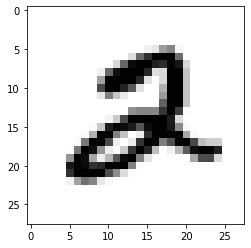

In [5]:
exImage = train_images[5]
exLabel = train_labels[5]
%matplotlib inline
import matplotlib.pyplot as plt 
plt.imshow(exImage, cmap=plt.cm.binary)
exLabel

In [11]:
from tensorflow.keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# As we can see transforming a image into a 1D array, loses spatial info. CNN better. 
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [13]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2569 - accuracy: 0.9260
Epoch 2/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.1043 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0684 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0489 - accuracy: 0.9854
Epoch 5/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0373 - accuracy: 0.9890


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0675 - accuracy: 0.9802
